### 영화 리뷰 분류 : 이진 분류 문제

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.7118 - loss: 0.5987 - val_accuracy: 0.8611 - val_loss: 0.4127
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8915 - loss: 0.3595 - val_accuracy: 0.8780 - val_loss: 0.3259
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9143 - loss: 0.2665 - val_accuracy: 0.8881 - val_loss: 0.2888
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9323 - loss: 0.2100 - val_accuracy: 0.8899 - val_loss: 0.2758
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9471 - loss: 0.1680 - val_accuracy: 0.8869 - val_loss: 0.2828
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9527 - loss: 0.1482 - val_accuracy: 0.8857 - val_loss: 0.2840
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9603 - loss: 0.1250 - val_accuracy: 0.8834 - val_loss: 0.2929
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9713 - loss: 0.1008 - val_accuracy: 0.8842 - v

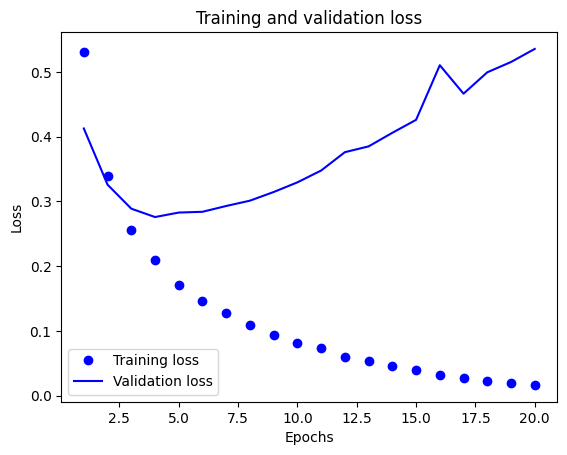

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7451 - loss: 0.5490
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9071 - loss: 0.2782
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9249 - loss: 0.2165
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9379 - loss: 0.1792
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8776 - loss: 0.3049
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.25691688],
       [0.9999117 ],
       [0.928155  ],
       ...,
       [0.20379327],
       [0.11963736],
       [0.7251348 ]], dtype=float32)

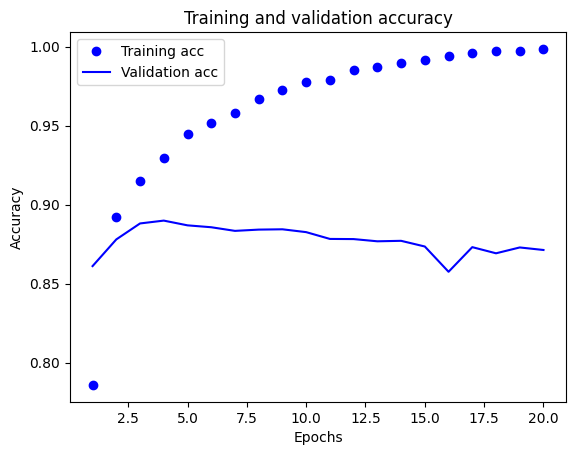

In [ ]:
#데이터셋 로드
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#리뷰 텍스트 디코딩

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#정수 시퀀스 멀티-핫 인코딩

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #크기 len(sequences), dimension 이고 모든 원소 0인 행렬
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.#훈련 데이터 벡터로 변환
    return results

x_trin = vectorize_sequences(train_data) #훈련 데이터 벡터로 변환
x_test = vectorize_sequences(test_data) #테스트 데이터 벡터로 변환

y_train = np.asarray(train_labels).astype('float32') #레이블을 벡터로 변환
y_test = np.asarray(test_labels).astype('float32')

#모델 정의

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#모델 컴파일

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#훈련 검증

x_val = x_trin[:10000]
partial_x_train = x_trin[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#모델 훈련

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

#결과 시각화

#-훈련과 검증 손실
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#-훈련과 검증 정확도
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#모델 처음부터 다시 훈련

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_trin, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

#새로운 데이터에 대해 예측
model.predict(x_test) #리뷰가 긍정일 확률 예측



### 뉴스 기사 분류 : 다중 분류 문제

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.4085 - loss: 3.1255 - val_accuracy: 0.6180 - val_loss: 1.7769
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6683 - loss: 1.5730 - val_accuracy: 0.6890 - val_loss: 1.3534
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7418 - loss: 1.1835 - val_accuracy: 0.7370 - val_loss: 1.1784
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7888 - loss: 0.9682 - val_accuracy: 0.7610 - val_loss: 1.0750
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8314 - loss: 0.7779 - val_accuracy: 0.7750 - val_loss: 0.9966
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8603 - loss: 0.6578 - val_accuracy: 0.7940 - val_loss: 0.9443
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8812 - loss: 0.5574 - val_accuracy: 0.8060 - val_loss: 0.9188
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9027 - loss: 0.4540 - val_accuracy: 0.8180 - v

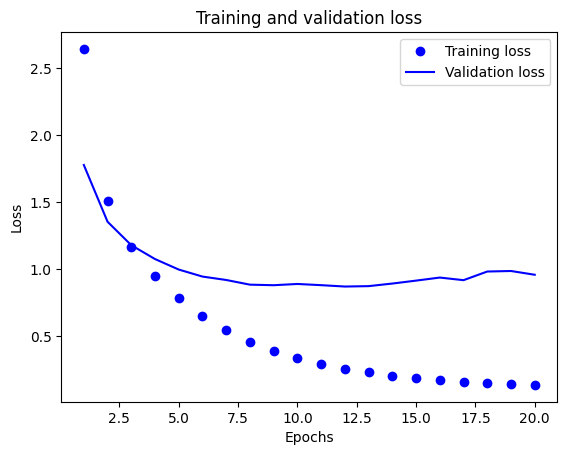

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3994 - loss: 3.1857
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6718 - loss: 1.5854
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7413 - loss: 1.1940
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.7895 - loss: 0.9668
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8307 - loss: 0.7906
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8579 - loss: 0.6653
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8826 - loss: 0.5460
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9043 - loss: 0.4687
Epoch 9/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9171 - loss: 0.3956
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7908 - loss: 0.9311
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[1.0844831e-04 6.1203423e-04 3.5655437e-04 ... 1.8001100e-04
  8.2593688e-06 1.9127583e-04]
 [1.5068076e-02 2.9646244e-02 9.3503036

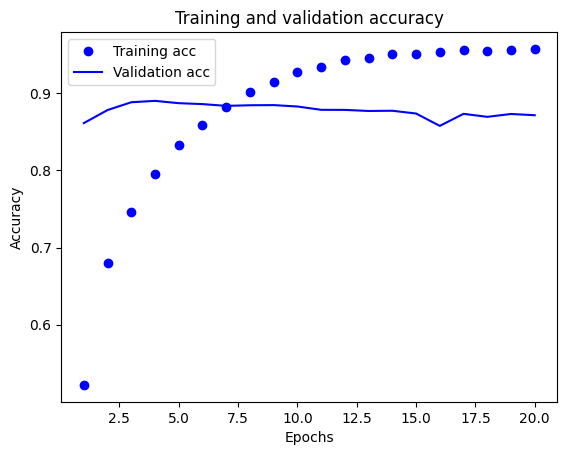

In [ ]:
#데이터셋 로드
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

#데이터셋 텍스트 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) #0, 1, 2는 패딩, 문서 시작, 사전에 없음을 위해 예약됨. 인덱스에서 3을 뺌\

#데이터 원핫 인코딩
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)


#모델 정의
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

#모델 컴파일
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#훈련 검증
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


#훈련과 검증 손실 그리기
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#훈련과 검증 정확도 그리기
plt.clf()
acc = history.history["accuracy"]
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#모델을 처음부터 다시 훈련하기

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, y_test)

#새로운 데이터에 대해 예측
predictions = model.predict(x_test)

print(prediction)

### 주택 가격 예측 : 회귀 문제

In [14]:
from os import truncate
#데이터셋 로드
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

train_data.shape
test_data.shape

#데이터 정규화

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

#DEFINTE MODEL
def build_model():
    model = keras.Sequential([ #동일한 모델 만들어 여러 번 생성할 것이므로 함수를 만들어 사용
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1) #선형 층, 스칼라 회귀를 위한 구성
    ])

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

#Verify K-layer
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model() #케라스 모델 구성, 케라스 모델 컴파일
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0) #모델 훈련
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) #모델 평가
    all_scores.append(val_mae)


#각 폴드의 검증점수 저장
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] #검증 데이터 준비, K번째 분할
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model() #케라스 모델 구성, 케라스 모델 컴파일

    history = model.fit(partial_train_data, partial_train_targets, #모델 훈련
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history
    all_mae_histories.append(mae_history)


#K-layer 검증 점수 평균 기록
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#검증 점수 그래프
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#처음 10개의 데이터포인트를 제외한 검증 점수 그래프 그리기
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


KeyError: 0

### MNIST
|

In [16]:

#데이터셋 로드
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
  #훈련 세트 , 테스트 세트

#신경망 구조
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 2


model.fit(train_images, train_labels, epochs=5, batch_size=128)

test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8720 - loss: 0.4401
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9642 - loss: 0.1168
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9774 - loss: 0.0734
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9850 - loss: 0.0501
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9892 - loss: 0.0386
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 8.2993
0.9761000275611877
